In [2]:
import pandas as pd
from datetime import datetime
from zoe import cases, query, pickle, find_previous, plot_study, plot_study_evolution

In [22]:
uk_active_cases = query("SELECT * FROM uk_active_cases", index='date')
uk_active_cases.index = pd.to_datetime(uk_active_cases.index, format='%Y%m%d')
uk_active_cases

,cartodb_id,the_geom,the_geom_webmercator,corrected_covid_positive
date,,,,
2020-06-12,20653,None,None,88646.232239
2020-06-13,20654,None,None,81926.974825
2020-06-14,20655,None,None,75739.071776
2020-06-15,20656,None,None,70083.994081
2020-06-16,20657,None,None,65136.261586
...,...,...,...,...
2020-12-26,20850,None,None,490841.517487
2020-12-27,20851,None,None,515637.534623
2020-12-28,20852,None,None,541165.864253


In [23]:
curr_date = uk_active_cases.index.max()
print(pickle(uk_active_cases, 'uk_active_cases', curr_date))

/Users/chris/coronavirus/data/zoe_uk_active_cases_2020-12-30_2020-12-30-20-05.pickle


In [24]:
prev_date, prev_uk_active_cases = find_previous(curr_date)

/Users/chris/coronavirus/data/zoe_uk_active_cases_2020-12-29_2020-12-29-16-40.pickle


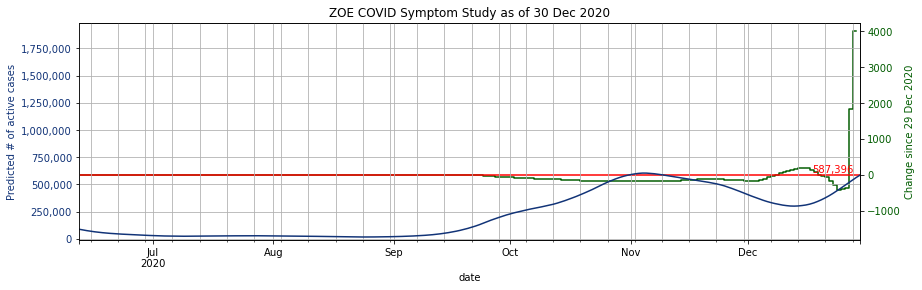

In [25]:
plot_study(curr_date, prev_date, uk_active_cases, prev_uk_active_cases)

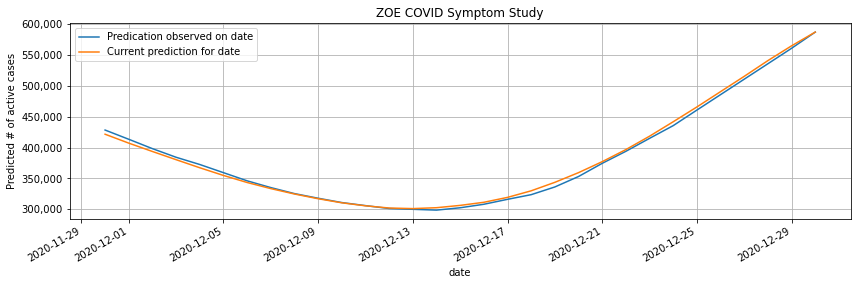

In [26]:
plot_study_evolution(curr_date, days=30)

In [27]:
prevalence_map = query("SELECT * FROM prevalence_map")
prevalence_map['percentage'] = prevalence_map['percentage'].astype(float)

In [28]:
for_date, = prevalence_map['data_status'].unique()
print(pickle(prevalence_map, 'prevalence_map', datetime.strptime(for_date, '%H:%M:%S %d-%m-%Y')))

/Users/chris/coronavirus/data/zoe_prevalence_map_2020-12-30_2020-12-30-20-05.pickle


In [29]:
prevalence_map[['lad16nm', 'lad16cd', 'percentage']].sort_values('percentage', ascending=False)[:10]

,lad16nm,lad16cd,percentage
384,Torfaen,W06000020,5.873050
343,Vale of Glamorgan,W06000014,4.700971
333,Flintshire,W06000005,3.875207
342,Bridgend,W06000013,3.815516
382,Caerphilly,W06000018,3.367922
381,Rhondda Cynon Taf,W06000016,3.332639
312,Bexley,E09000004,3.099322
339,Swansea,W06000011,3.038323
370,Redbridge,E09000026,2.998112
329,Denbighshire,W06000004,2.693893
